In [29]:
import matplotlib.pyplot as plt
import numpy as np
import os

from PIL import Image
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [1]:
def get_liter(name: str) -> str:
    liter = name.split('-')[0]
    return '\U00000462' if liter == "ять" else liter

In [61]:
def load_images(path: str) -> (np.array, np.array):
    images = []
    labels = []
    for pict in os.listdir(path):
        with Image.open(os.path.join(path, pict)) as image:
            b = image.getbbox()
            img = image.crop(b)
            img = img.resize((50, 50), resample=Image.NEAREST)
            img = np.array(img).flatten()
            images.append(img)
            labels.append(get_liter(pict))
    return np.array(images) / 255, np.array(labels)

In [62]:
def make_conf_matrix(trues, preds, labels):
    confusion_matrix = metrics.confusion_matrix(trues, preds)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=sorted(labels))
    cm_display.plot()
    plt.show()

In [63]:
X, labels = load_images(r'C:\Users\gudko\history_envs\sklearn_env\data_knn')
le = LabelEncoder()
y = le.fit_transform(labels) 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=313, test_size=0.15)

In [64]:
best_k, best_predict = None, None
best_metric = 0

labels = le.inverse_transform(y_test)

In [65]:
for k in range(2, 51):
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=5)
    model.fit(X_train, y_train)
    predicts = le.inverse_transform(model.predict(X_test))
    metric = metrics.f1_score(labels, predicts, average='macro')
    if metric > best_metric:
        best_metric = metric
        best_k = k
        best_predict = predicts

Best K: 25    F1: 0.5728337754199824


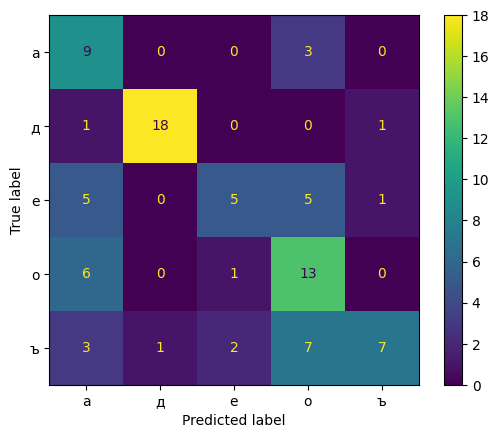

In [66]:
print(f"Best K: {best_k}    F1: {best_metric}")
make_conf_matrix(labels, best_predict, le.classes_)